In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sklearn
#import json
import warnings
warnings.filterwarnings('ignore')

## Lets load the data that we preprocessed


In [2]:
df= pd.read_csv("../Accident_Stats/Processed_USAccidents.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.head()   #see data and start looking to filter out data

In [ ]:
df.shape

In [ ]:
df.isna().sum() # View any null data stats... confirm no further processing is needed 

In [ ]:
df.columns   #print columns and verify preprocessed data is what we want to use to train models

# Severity will be our expected "result"
## All other columns will be used to train, test the data


In [4]:
y = df['Severity']
X = df.drop(['Severity'], axis = 1)

In [ ]:
print(f"==X headers: \n", X.head(2))
print(f"==Y headers: \n", y.head(2))

# We have values... time to set models and test which model will be appropiate for this dataset


# Decision Tree with MinMaxScalar (with Feature importance)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import MinMaxScaler
scalerDT = MinMaxScaler()
scaled_DT = scalerDT.fit_transform(X)

In [7]:
Xdt_train, Xdt_test, ydt_train, ydt_test = train_test_split(scaled_DT, y, test_size=0.3, random_state=120)

In [8]:
#breaking up my original code as i didnt need classifer as a var, or the fitted model
#but to determine if the "features importance" is needed, i will need them defined.
DTclf = DecisionTreeClassifier(criterion = "gini", random_state=120)
DTclf.fit(X=Xdt_train, y=ydt_train)
Y_test_predicted = DTclf.predict(Xdt_test)
#Y_test_predicted = DecisionTreeClassifier(criterion = "gini", random_state=120).fit(X=Xdt_train, y=ydt_train).predict(Xdt_test)

In [9]:
print("Decision Tree")
print(classification_report(ydt_test,Y_test_predicted, digits=4))

Decision Tree
              precision    recall  f1-score   support

           1     0.3383    0.4060    0.3691      7753
           2     0.9278    0.9288    0.9283    759710
           3     0.3056    0.2935    0.2994     46779
           4     0.3433    0.3387    0.3410     39361

    accuracy                         0.8620    853603
   macro avg     0.4787    0.4918    0.4844    853603
weighted avg     0.8614    0.8620    0.8617    853603



In [10]:
print("DT Accuracy MINMAXSCALAR:",metrics.accuracy_score(ydt_test, Y_test_predicted))
#DT Accuracy: 0.853436550715028

##ACCURACY OF THE MODEL (feature importance, features removed)
#DT Accuracy MINMAXSCALAR: 0.8620295383216788

DT Accuracy MINMAXSCALAR: 0.8620295383216788


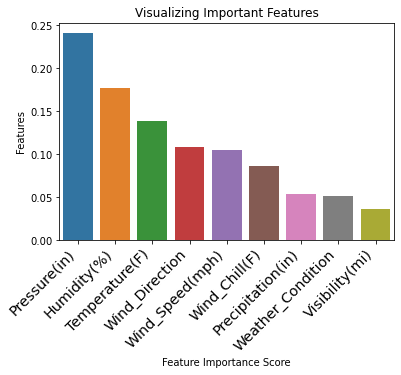

In [14]:
# visualize important featuers
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": DTclf.feature_importances_}
).sort_values("importance", ascending=False)
feature_importances_df

# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

# First 10 features are not very useful to our DT so well remove them and rerun our model

In [12]:
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": DTclf.feature_importances_}
).sort_values("importance", ascending=False)
feature_importances_df

,feature,importance
3,Pressure(in),0.240891
2,Humidity(%),0.177356
0,Temperature(F),0.139163
5,Wind_Direction,0.108944
6,Wind_Speed(mph),0.105571
1,Wind_Chill(F),0.086503
7,Precipitation(in),0.054255
8,Weather_Condition,0.051242
4,Visibility(mi),0.036076


In [3]:
#easier to reset jupyter and manually remove then re-assign x and y
#df = df.drop(['Crossing','Traffic_Signal','Junction','Station'], axis=1)
#df = df.drop(['Stop','Railway','Give_Way','No_Exit','Bump','Roundabout','Turning_Loop'], axis=1)

In [13]:
X.head()

,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
0,42.1,36.100000,58.0,29.76,10.0,13,10.400000,0.000000,56
1,36.9,59.658231,91.0,29.68,10.0,0,7.395044,0.020000,56
2,36.0,59.658231,97.0,29.70,10.0,0,7.395044,0.020000,79
3,39.0,59.658231,55.0,29.65,10.0,0,7.395044,0.007017,79
4,37.0,29.800000,93.0,29.69,10.0,17,10.400000,0.010000,56


In [ ]:
%who_ls DataFrame

In [ ]:
#clean out pd.Series we created
ydt_test = None
ydt_train = None
del [ydt_test, ydt_train]
%who_ls Series

In [ ]:
%who_ls ndarray

In [ ]:
for xt in [Xdt_test, Xdt_train, Y_test_predicted]:
    xt = None
del Xdt_test 
del Xdt_train
del Y_test_predicted
del xt

In [ ]:
%who_ls ndarray

In [ ]:
%whos

# Random Forest with MinMaxScalar (with Feature Importance)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [16]:
# Apply minmaxscalar before train_test_split, 

In [17]:
scalerRF = MinMaxScaler()
Scaled_RF = scalerRF.fit_transform(X)

In [18]:
XRF_train, XRF_test, yRF_train, yRF_test = train_test_split(Scaled_RF, y, test_size=0.3, random_state=150)

In [19]:
  # creating a RF classifier
RFclf = RandomForestClassifier(n_estimators = 100)
  # Training the model on the training dataset
  # fit function is used to train the model using the training sets as parameters
RFclf.fit(XRF_train, yRF_train)
  # performing predictions on the test dataset
RFy_pred = RFclf.predict(XRF_test)

  # metrics are used to find accuracy or error
from sklearn import metrics
print()
  # using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(yRF_test, RFy_pred))


ACCURACY OF THE MODEL:  0.9032161320895077


In [ ]:
#ACCURACY OF THE MODEL:  0.9007969747060401
##ACCURACY OF THE MODEL (feature importance, features removed):  0.9032161320895077

In [20]:
# check Important features
RFfeature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": RFclf.feature_importances_}
).sort_values("importance", ascending=False)

# Display our findings
RFfeature_importances_df

,feature,importance
3,Pressure(in),0.247994
2,Humidity(%),0.186315
0,Temperature(F),0.146015
5,Wind_Direction,0.105909
6,Wind_Speed(mph),0.098970
1,Wind_Chill(F),0.082143
8,Weather_Condition,0.053676
7,Precipitation(in),0.043501
4,Visibility(mi),0.035478
